In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
excel = 'C:\\Users\\UsuarioFinal\\Desktop\\COVID-19-8.xlsx'
xl = pd.ExcelFile(excel)
municipios = xl.sheet_names
municipios.remove('Resumen')
municipios.remove('Hoja1')


In [3]:
#Crear lista que almacena los municipios con las 3 columnas que nos interesan
lista_m = []
for municipio in municipios:
    df = xl.parse(municipio, skiprows = 2)
    df.rename(columns=lambda x: x.strip(), inplace=True)
    m = ['Total defunciones', 'Total confirmados',
       'HUMIDEX (Valor obtenido a partir de la temperatura maxima y humedad relativa. Determina el confort debido a la temperatura aparente al combinar factores como humedad y temperatura.']
    dm = df[m].copy()  
    lista_m.append(dm)

for r in lista_m:
    # Renombrar la columna 'HUMIDEX'
    r.rename(columns={'HUMIDEX (Valor obtenido a partir de la temperatura maxima y humedad relativa. Determina el confort debido a la temperatura aparente al combinar factores como humedad y temperatura.': 'HUMIDEX'}, inplace=True)

In [4]:
#Limpiar datos de valores no numericos
for lista in lista_m:
    lista.dropna(subset = ['Total defunciones', 'Total confirmados', 'HUMIDEX'], inplace = True)
    
    

## El documento realiza regresiones lineales para diferentes municipios, utilizando el número total de defunciones como variable dependiente y el índice HUMIDEX como variable independiente. Luego, crea un DataFrame que almacena los resultados de estas regresiones, incluyendo la intercepción, la pendiente y el coeficiente de determinación (R cuadrada), y ordena este DataFrame en función de los valores de R cuadrada de mayor a menor. Finalmente, muestra los primeros 10 resultados ordenados.

In [5]:
# Lista para almacenar los resultados de la regresión
valores_DH = []

# Lista para almacenar los modelos de regresión
modelos_DH = []

for a in lista_m:
    X = a['Total defunciones'].values.reshape(-1, 1)
    Y = a['HUMIDEX'].values.reshape(-1, 1)
    regresion = linear_model.LinearRegression()
    modelo_m = regresion.fit(X, Y)
    modelos_DH.append(modelo_m)
    intercepcion = modelo_m.intercept_
    pendiente = modelo_m.coef_
    Y_pred = modelo_m.predict(X)
    R_cuadrada = r2_score(Y, Y_pred)
    valores_DH.append((intercepcion, pendiente, R_cuadrada))

# Crear un DataFrame vacío
df_modelos_DH = pd.DataFrame()

# Añadir los nombres de los municipios al DataFrame
df_modelos_DH['Municipio'] = municipios

# Añadir los valores de intercepción, pendiente y R^2 al DataFrame
df_modelos_DH['Intercepcion'] = [val[0] for val in valores_DH]
df_modelos_DH['Pendiente'] = [val[1] for val in valores_DH]
df_modelos_DH['R_cuadrada'] = [val[2] for val in valores_DH]

# Ordenar el DataFrame por la columna 'R_cuadrada' de mayor a menor
df_modelos_DH = df_modelos_DH.sort_values(by='R_cuadrada', ascending=False)

# Mostrar el DataFrame ordenado
df_modelos_DH.head(10)


,Municipio,Intercepcion,Pendiente,R_cuadrada
25,Salamanca,[33.449887606757734],[[0.061792116795769035]],0.640281
27,Santa Catarina,[39.41941149385344],[[-6.048394750581701]],0.407068
44,Xichú,[37.094742589111156],[[-1.9973399537980001]],0.401526
8,Cuerámaro,[38.440843850286655],[[-1.425410122437012]],0.388651
13,Irapuato,[41.519568618383495],[[-0.024090938049771072]],0.287781
28,San Diego de la Unión,[35.0872514481096],[[-1.1147665420031296]],0.237018
32,San Luis de la Paz,[34.48493699216117],[[-0.12275356985096969]],0.207146
12,Huanímaro,[34.47658874895679],[[-1.0640952470236997]],0.177274
41,Victoria,[36.89194699732606],[[-1.6943897212724628]],0.164009
4,Apaseo el grande,[36.92530413625038],[[-0.14184718454084277]],0.138596


El código realiza regresiones lineales para diferentes municipios, utilizando el número total de confirmados como variable dependiente y el índice HUMIDEX como variable independiente. Luego, crea un DataFrame que almacena los resultados de estas regresiones, incluyendo la intercepción, la pendiente y el coeficiente de determinación (R cuadrada), y ordena este DataFrame en función de los valores de R cuadrada de mayor a menor. Finalmente, muestra los primeros 10 resultados ordenados.

En la lista ordenada se aprecia que ningun modelo tiene un valor R_cuadrada prometedor

In [6]:
#lista modelos confirmados humidex
valores_CH = []
modelos_CH = []
for a in lista_m:
    X = a['Total confirmados'].values.reshape(-1,1)
    Y = a['HUMIDEX'].values.reshape(-1,1)
    regresion_t = linear_model.LinearRegression()
    modelo_m = regresion_t.fit(X,Y)
    modelos_CH.append(modelo_m)
    intercepcion = modelo_m.intercept_
    pendiente = modelo_m.coef_
    Y_pred = modelo_m.predict(X)
    R_cuadrada = r2_score(Y, Y_pred)
    valores_CH.append((intercepcion, pendiente, R_cuadrada))

# Crear un DataFrame vacío
df_modelos_CH = pd.DataFrame()

# Añadir los nombres de los municipios al DataFrame
df_modelos_CH['Municipio'] = municipios

# Añadir los valores de intercepción, pendiente y R^2 al DataFrame
df_modelos_CH['Intercepcion'] = [val[0] for val in valores_CH]
df_modelos_CH['Pendiente'] = [val[1] for val in valores_CH]
df_modelos_CH['R_cuadrada'] = [val[2] for val in valores_CH]

# Ordenar el DataFrame por la columna 'R_cuadrada' de mayor a menor
df_modelos_CH = df_modelos_CH.sort_values(by='R_cuadrada', ascending=False)

# Mostrar el DataFrame ordenado
df_modelos_CH.head(10)


,Municipio,Intercepcion,Pendiente,R_cuadrada
25,Salamanca,[31.00665515063275],[[0.12332754797913102]],0.638282
44,Xichú,[37.477718149974],[[-0.29673183469856274]],0.361013
8,Cuerámaro,[38.82636231939188],[[-0.03559663693412317]],0.356748
13,Irapuato,[41.59781725557654],[[-0.0012422387378654485]],0.292507
28,San Diego de la Unión,[35.23147264315401],[[-0.019527416744426818]],0.266528
32,San Luis de la Paz,[34.46640989345273],[[-0.007663734472250457]],0.228043
9,Coroneo,[35.987536695324295],[[-0.06050833192859013]],0.196789
41,Victoria,[37.11999577831462],[[-0.11829678209706708]],0.187143
36,Tarandacuao,[37.452228897274836],[[-0.06262746665981882]],0.177272
27,Santa Catarina,[39.408701093777964],[[-0.2093224965089785]],0.169838


### Se evidencia que ninguno de los modelos, destinados a predecir el número total de defunciones y confirmados, exhibe un valor R cuadrada prometedor. El máximo apenas alcanza un valor cercano al 60%, lo que sugiere que, al menos con estos datos, no podemos concluir que el HUMIDEX tenga una influencia significativa en nuestras variables dependientes.

### Realizaremos un análisis de las variables IMECA_2.5, IMECA_SO2, IMECA_CO, IMECA_NO2, IMECA_PM10 e IMECA_O3 como variables independientes en relación con el número total de confirmados y defunciones en los municipios que cuenten con detectores de estos compuestos, especialmente en Leon, Salamanca, Celaya e Irapuato. Se llevará a cabo una regresión univariable para cada compuesto con el objetivo de evaluar los valores de R cuadrada y comprender mejor la relación entre las variables.

# Valores IMECA  PM2.5

In [7]:

# Crear un DataFrame vacío
municipios_IMECA = pd.DataFrame(columns=['Municipio', 'Intercepcion', 'Pendiente', 'R_cuadrada'])

dfg = xl.parse('Guanajuato', skiprows = 2)
dfg = dfg.dropna(subset=['IMECA (PM2.5)', 'Total confirmados', 'Total defunciones '])
Xg = dfg['IMECA (PM2.5)'].values.reshape(-1,1)
Ygc = dfg['Total confirmados'].values.reshape(-1,1)
Ygd = dfg['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_g = linear_model.LinearRegression()
modelo_g = regresion_g.fit(Xg, Ygc)
Y_pg = modelo_g.predict(Xg)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Guanajuato_confirmados', 'Intercepcion': modelo_g.intercept_[0], 'Pendiente': modelo_g.coef_[0][0], 'R_cuadrada': r2_score(Ygc,Y_pg)}, ignore_index=True)

# Modelo para defunciones
regresion_gd = linear_model.LinearRegression()
modelo_gd = regresion_gd.fit(Xg,Ygd)
Y_pgd = modelo_gd.predict(Xg)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Guanajuato_defunciones', 'Intercepcion': modelo_gd.intercept_[0], 'Pendiente': modelo_gd.coef_[0][0], 'R_cuadrada': r2_score(Ygd,Y_pgd)}, ignore_index=True)


In [8]:
dfa = xl.parse(' Abasolo', skiprows = 2)
dfa = dfa.dropna(subset=['IMECA (PM2.5)', 'Total confirmados ', 'Total defunciones '])
Xa = dfa['IMECA (PM2.5)'].values.reshape(-1,1)
Yac = dfa['Total confirmados '].values.reshape(-1,1)
Yad = dfa['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_a = linear_model.LinearRegression()
modelo_a = regresion_a.fit(Xa, Yac)
Ya_pg = modelo_a.predict(Xa)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Abasolo_confirmados', 'Intercepcion': modelo_a.intercept_[0], 'Pendiente': modelo_a.coef_[0][0], 'R_cuadrada': r2_score(Yac,Ya_pg)}, ignore_index=True)

# Modelo para defunciones
regresion_ad = linear_model.LinearRegression()
modelo_ad = regresion_ad.fit(Xa,Yad)
Ya_pgd = modelo_ad.predict(Xa)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Abasolo_defunciones', 'Intercepcion': modelo_ad.intercept_[0], 'Pendiente': modelo_ad.coef_[0][0], 'R_cuadrada': r2_score(Yad,Ya_pgd)}, ignore_index=True)



In [9]:
df_celaya = xl.parse('Celaya', skiprows = 2)
df_celaya['IMECA (PM2.5)'] = df_celaya[['IMECA (PM2.5)_1', 'IMECA (PM2.5)_2']].mean(axis=1)
df_celaya = df_celaya.dropna(subset=['IMECA (PM2.5)', 'Total confirmados ', 'Total defunciones '])
Xc = df_celaya['IMECA (PM2.5)'].values.reshape(-1,1)
Ycc = df_celaya['Total confirmados '].values.reshape(-1,1)
Ycd = df_celaya['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_c = linear_model.LinearRegression()
modelo_c = regresion_c.fit(Xc, Ycc)
Yc_pg = modelo_c.predict(Xc)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Celaya_confirmados', 'Intercepcion': modelo_c.intercept_[0], 'Pendiente': modelo_c.coef_[0][0], 'R_cuadrada': r2_score(Ycc,Yc_pg)}, ignore_index=True)

# Modelo para defunciones
regresion_cd = linear_model.LinearRegression()
modelo_cd = regresion_cd.fit(Xc,Ycd)
Yc_pgd = modelo_cd.predict(Xc)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Celaya_defunciones', 'Intercepcion': modelo_cd.intercept_[0], 'Pendiente': modelo_cd.coef_[0][0], 'R_cuadrada': r2_score(Ycd,Yc_pgd)}, ignore_index=True)




In [10]:
df_irapuato = xl.parse('Irapuato', skiprows = 2)
df_irapuato['IMECA (PM2.5)'] = df_irapuato[['IMECA (PM2.5)_1', 'IMECA (PM2.5)_2']].mean(axis=1)
df_irapuato = df_irapuato.dropna(subset=['IMECA (PM2.5)', 'Total confirmados ', 'Total defunciones '])
Xi = df_irapuato['IMECA (PM2.5)'].values.reshape(-1,1)
Yic = df_irapuato['Total confirmados '].values.reshape(-1,1)
Yid = df_irapuato['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_i = linear_model.LinearRegression()
modelo_i = regresion_i.fit(Xi, Yic)
Yi_pg = modelo_i.predict(Xi)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Irapuato_confirmados', 'Intercepcion': modelo_i.intercept_[0], 'Pendiente': modelo_i.coef_[0][0], 'R_cuadrada': r2_score(Yic,Yi_pg)}, ignore_index=True)

# Modelo para defunciones
regresion_id = linear_model.LinearRegression()
modelo_id = regresion_id.fit(Xi,Yid)
Yi_pgd = modelo_id.predict(Xi)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Irapuato_defunciones', 'Intercepcion': modelo_id.intercept_[0], 'Pendiente': modelo_id.coef_[0][0], 'R_cuadrada': r2_score(Yid,Yi_pgd)}, ignore_index=True)



In [11]:
df_leon = xl.parse('León', skiprows = 2)
df_leon = df_leon.dropna(subset=['IMECA (PM2.5)_1', 'Total confirmados ', 'Total defunciones '])
Xl = df_leon['IMECA (PM2.5)_1'].values.reshape(-1,1)
Ylc = df_leon['Total confirmados '].values.reshape(-1,1)
Yld = df_leon['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_l = linear_model.LinearRegression()
modelo_l = regresion_l.fit(Xl, Ylc)
Yl_pg = modelo_l.predict(Xl)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'León_confirmados', 'Intercepcion': modelo_l.intercept_[0], 'Pendiente': modelo_l.coef_[0][0], 'R_cuadrada': r2_score(Ylc,Yl_pg)}, ignore_index=True)

# Modelo para defunciones
regresion_ld = linear_model.LinearRegression()
modelo_ld = regresion_ld.fit(Xl,Yld)
Yl_pgd = modelo_ld.predict(Xl)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'León_defunciones', 'Intercepcion': modelo_ld.intercept_[0], 'Pendiente': modelo_ld.coef_[0][0], 'R_cuadrada': r2_score(Yld,Yl_pgd)}, ignore_index=True)




In [12]:

df_salamanca = xl.parse('Salamanca', skiprows = 2)
df_salamanca['IMECA (PM2.5)'] = df_salamanca[['IMECA (PM2.5)_1', 'IMECA (PM2.5)_2']].mean(axis=1)
df_salamanca = df_salamanca.dropna(subset=['IMECA (PM2.5)', 'Total confirmados ', 'Total defunciones '])
Xs = df_salamanca['IMECA (PM2.5)'].values.reshape(-1,1)
Ysc = df_salamanca['Total confirmados '].values.reshape(-1,1)
Ysd = df_salamanca['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_s = linear_model.LinearRegression()
modelo_s = regresion_s.fit(Xs, Ysc)
Ys_pg = modelo_s.predict(Xs)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Salamanca_confirmados', 'Intercepcion': modelo_s.intercept_[0], 'Pendiente': modelo_s.coef_[0][0], 'R_cuadrada': r2_score(Ysc,Ys_pg)}, ignore_index=True)

# Modelo para defunciones
regresion_sd = linear_model.LinearRegression()
modelo_sd = regresion_sd.fit(Xs,Ysd)
Ys_pgd = modelo_sd.predict(Xs)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'Salamanca_defunciones', 'Intercepcion': modelo_sd.intercept_[0], 'Pendiente': modelo_sd.coef_[0][0], 'R_cuadrada': r2_score(Ysd,Ys_pgd)}, ignore_index=True)




In [13]:
df_slp = xl.parse('San Luis de la Paz', skiprows = 2)
df_slp = df_slp.dropna(subset=['IMECA (PM2.5)_1', 'Total confirmados', 'Total defunciones '])
Xslp = df_slp['IMECA (PM2.5)_1'].values.reshape(-1,1)
Yslpc = df_slp['Total confirmados'].values.reshape(-1,1)
Yslpd = df_slp['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_slp = linear_model.LinearRegression()
modelo_slp = regresion_slp.fit(Xslp, Yslpc)
Yslp_pg = modelo_slp.predict(Xslp)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'San Luis de la Paz_confirmados', 'Intercepcion': modelo_slp.intercept_[0], 'Pendiente': modelo_slp.coef_[0][0], 'R_cuadrada': r2_score(Yslpc,Yslp_pg)}, ignore_index=True)

# Modelo para defunciones
regresion_slpd = linear_model.LinearRegression()
modelo_slpd = regresion_slpd.fit(Xslp,Yslpd)
Yslp_pgd = modelo_slpd.predict(Xslp)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'San Luis de la Paz_defunciones', 'Intercepcion': modelo_slpd.intercept_[0], 'Pendiente': modelo_slpd.coef_[0][0], 'R_cuadrada': r2_score(Yslpd,Yslp_pgd)}, ignore_index=True)




In [14]:
df_sma = xl.parse('San Miguel de Allende', skiprows = 2)
df_sma = df_sma.dropna(subset=['IMECA (PM2.5)_1', 'Total confirmados', 'Total defunciones'])
Xsma = df_sma['IMECA (PM2.5)_1'].values.reshape(-1,1)
Ysmac = df_sma['Total confirmados'].values.reshape(-1,1)
Ysmad = df_sma['Total defunciones'].values.reshape(-1,1)

# Modelo para confirmados
regresion_sma = linear_model.LinearRegression()
modelo_sma = regresion_sma.fit(Xsma, Ysmac)
Ysma_pg = modelo_sma.predict(Xsma)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'San Miguel de Allende_confirmados', 'Intercepcion': modelo_sma.intercept_[0], 'Pendiente': modelo_sma.coef_[0][0], 'R_cuadrada': r2_score(Ysmac,Ysma_pg)}, ignore_index=True)

# Modelo para defunciones
regresion_smad = linear_model.LinearRegression()
modelo_smad = regresion_smad.fit(Xsma,Ysmad)
Ysma_pgd = modelo_smad.predict(Xsma)
municipios_IMECA = municipios_IMECA.append({'Municipio': 'San Miguel de Allende_defunciones', 'Intercepcion': modelo_smad.intercept_[0], 'Pendiente': modelo_smad.coef_[0][0], 'R_cuadrada': r2_score(Ysmad,Ysma_pgd)}, ignore_index=True)




# Tabla IMECA PM2.5

In [15]:
municipios_IMECA = municipios_IMECA.sort_values(by = 'R_cuadrada', ascending = False)
municipios_IMECA

,Municipio,Intercepcion,Pendiente,R_cuadrada
7,Irapuato_defunciones,198.551979,-2.460724,0.302036
6,Irapuato_confirmados,3893.318102,-47.302544,0.291964
5,Celaya_defunciones,208.027916,-2.152688,0.280146
13,San Luis de la Paz_defunciones,26.634544,-0.380423,0.226239
15,San Miguel de Allende_defunciones,14.648320,-0.221363,0.218758
1,Guanajuato_defunciones,59.702115,-0.711021,0.216655
4,Celaya_confirmados,2367.597964,-26.895857,0.210548
0,Guanajuato_confirmados,967.202542,-14.712361,0.205323
12,San Luis de la Paz_confirmados,417.845105,-5.994313,0.204545
14,San Miguel de Allende_confirmados,334.437203,-4.866544,0.183959


# Valores IMECA SO2

In [16]:
# Crear un nuevo DataFrame vacío
municipios_IMECA_SO2 = pd.DataFrame(columns=['Municipio', 'Intercepcion', 'Pendiente', 'R_cuadrada'])

df_celaya = xl.parse('Celaya', skiprows = 2)
df_celaya['IMECA SO2'] = df_celaya[['IMECA SO2-1', 'IMECA SO2-2']].mean(axis=1)
df_celaya = df_celaya.dropna(subset=['IMECA SO2', 'Total confirmados ', 'Total defunciones '])
Xc_SO2 = df_celaya['IMECA SO2'].values.reshape(-1,1)
Ycc_SO2 = df_celaya['Total confirmados '].values.reshape(-1,1)
Ycd_SO2 = df_celaya['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_c_SO2 = linear_model.LinearRegression()
modelo_c_SO2 = regresion_c_SO2.fit(Xc_SO2, Ycc_SO2)
Yc_pg_SO2 = modelo_c_SO2.predict(Xc_SO2)
municipios_IMECA_SO2 = municipios_IMECA_SO2.append({'Municipio': 'Celaya_confirmados_SO2', 'Intercepcion': modelo_c_SO2.intercept_[0], 'Pendiente': modelo_c_SO2.coef_[0][0], 'R_cuadrada': r2_score(Ycc_SO2,Yc_pg_SO2)}, ignore_index=True)

# Modelo para defunciones
regresion_cd_SO2 = linear_model.LinearRegression()
modelo_cd_SO2 = regresion_cd_SO2.fit(Xc_SO2,Ycd_SO2)
Yc_pgd_SO2 = modelo_cd_SO2.predict(Xc_SO2)
municipios_IMECA_SO2 = municipios_IMECA_SO2.append({'Municipio': 'Celaya_defunciones_SO2', 'Intercepcion': modelo_cd_SO2.intercept_[0], 'Pendiente': modelo_cd_SO2.coef_[0][0], 'R_cuadrada': r2_score(Ycd_SO2,Yc_pgd_SO2)}, ignore_index=True)




In [17]:
df_irapuato = xl.parse('Irapuato', skiprows = 2)
df_irapuato['IMECA SO2'] = df_irapuato[['IMECA SO2-1', 'IMECA SO2-2']].mean(axis=1)
df_irapuato = df_irapuato.dropna(subset=['IMECA SO2', 'Total confirmados ', 'Total defunciones '])
Xi_SO2 = df_irapuato['IMECA SO2'].values.reshape(-1,1)
Yic_SO2 = df_irapuato['Total confirmados '].values.reshape(-1,1)
Yid_SO2 = df_irapuato['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_i_SO2 = linear_model.LinearRegression()
modelo_i_SO2 = regresion_i_SO2.fit(Xi_SO2, Yic_SO2)
Yi_pg_SO2 = modelo_i_SO2.predict(Xi_SO2)
municipios_IMECA_SO2 = municipios_IMECA_SO2.append({'Municipio': 'Irapuato_confirmados_SO2', 'Intercepcion': modelo_i_SO2.intercept_[0], 'Pendiente': modelo_i_SO2.coef_[0][0], 'R_cuadrada': r2_score(Yic_SO2,Yi_pg_SO2)}, ignore_index=True)

# Modelo para defunciones
regresion_id_SO2 = linear_model.LinearRegression()
modelo_id_SO2 = regresion_id_SO2.fit(Xi_SO2,Yid_SO2)
Yi_pgd_SO2 = modelo_id_SO2.predict(Xi_SO2)
municipios_IMECA_SO2 = municipios_IMECA_SO2.append({'Municipio': 'Irapuato_defunciones_SO2', 'Intercepcion': modelo_id_SO2.intercept_[0], 'Pendiente': modelo_id_SO2.coef_[0][0], 'R_cuadrada': r2_score(Yid_SO2,Yi_pgd_SO2)}, ignore_index=True)



In [18]:
df_Leon = xl.parse('León', skiprows = 2)
df_Leon['IMECA SO2'] = df_Leon[['IMECA SO2-1', 'IMECA SO2-2', 'IMECA SO2-3']].mean(axis=1)
df_Leon = df_Leon.dropna(subset=['IMECA SO2', 'Total confirmados ', 'Total defunciones '])
Xl_SO2 = df_Leon['IMECA SO2'].values.reshape(-1,1)
Ylc_SO2 = df_Leon['Total confirmados '].values.reshape(-1,1)
Yld_SO2 = df_Leon['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_l_SO2 = linear_model.LinearRegression()
modelo_l_SO2 = regresion_l_SO2.fit(Xl_SO2, Ylc_SO2)
Yl_pg_SO2 = modelo_l_SO2.predict(Xl_SO2)
municipios_IMECA_SO2 = municipios_IMECA_SO2.append({'Municipio': 'Leon_confirmados_SO2', 'Intercepcion': modelo_l_SO2.intercept_[0], 'Pendiente': modelo_l_SO2.coef_[0][0], 'R_cuadrada': r2_score(Ylc_SO2,Yl_pg_SO2)}, ignore_index=True)

# Modelo para defunciones
regresion_ld_SO2 = linear_model.LinearRegression()
modelo_ld_SO2 = regresion_ld_SO2.fit(Xl_SO2,Yld_SO2)
Yl_pgd_SO2 = modelo_ld_SO2.predict(Xl_SO2)
municipios_IMECA_SO2 = municipios_IMECA_SO2.append({'Municipio': 'Leon_defunciones_SO2', 'Intercepcion': modelo_ld_SO2.intercept_[0], 'Pendiente': modelo_ld_SO2.coef_[0][0], 'R_cuadrada': r2_score(Yld_SO2,Yl_pgd_SO2)}, ignore_index=True)




In [19]:
df_Salamanca = xl.parse('Salamanca', skiprows = 2)
df_Salamanca['IMECA SO2'] = df_Salamanca[['IMECA SO2-1', 'IMECA SO2-2', 'IMECA SO2-3']].mean(axis=1)
df_Salamanca = df_Salamanca.dropna(subset=['IMECA SO2', 'Total confirmados ', 'Total defunciones '])
Xs_SO2 = df_Salamanca['IMECA SO2'].values.reshape(-1,1)
Ysc_SO2 = df_Salamanca['Total confirmados '].values.reshape(-1,1)
Ysd_SO2 = df_Salamanca['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_s_SO2 = linear_model.LinearRegression()
modelo_s_SO2 = regresion_s_SO2.fit(Xs_SO2, Ysc_SO2)
Ys_pg_SO2 = modelo_s_SO2.predict(Xs_SO2)
municipios_IMECA_SO2 = municipios_IMECA_SO2.append({'Municipio': 'Salamanca_confirmados_SO2', 'Intercepcion': modelo_s_SO2.intercept_[0], 'Pendiente': modelo_s_SO2.coef_[0][0], 'R_cuadrada': r2_score(Ysc_SO2,Ys_pg_SO2)}, ignore_index=True)

# Modelo para defunciones
regresion_sd_SO2 = linear_model.LinearRegression()
modelo_sd_SO2 = regresion_sd_SO2.fit(Xs_SO2,Ysd_SO2)
Ys_pgd_SO2 = modelo_sd_SO2.predict(Xs_SO2)
municipios_IMECA_SO2 = municipios_IMECA_SO2.append({'Municipio': 'Salamanca_defunciones_SO2', 'Intercepcion': modelo_sd_SO2.intercept_[0], 'Pendiente': modelo_sd_SO2.coef_[0][0], 'R_cuadrada': r2_score(Ysd_SO2,Ys_pgd_SO2)}, ignore_index=True)

municipios_IMECA_SO2 = municipios_IMECA_SO2.sort_values(by = 'R_cuadrada',ascending = False)


# Tabla IMECA SO2

In [20]:
municipios_IMECA_SO2

,Municipio,Intercepcion,Pendiente,R_cuadrada
0,Celaya_confirmados_SO2,2643.465487,-222.891022,0.664901
1,Celaya_defunciones_SO2,212.351038,-15.203370,0.631521
4,Leon_confirmados_SO2,20378.332273,-3007.129909,0.494027
5,Leon_defunciones_SO2,1252.382017,-185.103795,0.456631
6,Salamanca_confirmados_SO2,26.232708,1.964470,0.234569
2,Irapuato_confirmados_SO2,5481.029412,-373.671616,0.228165
7,Salamanca_defunciones_SO2,13.352010,3.859688,0.226606
3,Irapuato_defunciones_SO2,268.658000,-18.233721,0.207679


# IMECA CO

In [21]:
# Crear un nuevo DataFrame vacío
municipios_IMECA_CO = pd.DataFrame(columns=['Municipio', 'Intercepcion', 'Pendiente', 'R_cuadrada'])

df_celaya['IMECA CO'] = df_celaya[['IMECA CO_1', 'IMECA CO_2']].mean(axis=1)
df_celaya = df_celaya.dropna(subset=['IMECA CO', 'Total confirmados ', 'Total defunciones '])
Xc_CO = df_celaya['IMECA CO'].values.reshape(-1,1)
Ycc_CO = df_celaya['Total confirmados '].values.reshape(-1,1)
Ycd_CO = df_celaya['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_c_CO = linear_model.LinearRegression()
modelo_c_CO = regresion_c_CO.fit(Xc_CO, Ycc_CO)
Yc_pg_CO = modelo_c_CO.predict(Xc_CO)
municipios_IMECA_CO = municipios_IMECA_CO.append({'Municipio': 'Celaya_confirmados_CO', 'Intercepcion': modelo_c_CO.intercept_[0], 'Pendiente': modelo_c_CO.coef_[0][0], 'R_cuadrada': r2_score(Ycc_CO,Yc_pg_CO)}, ignore_index=True)

# Modelo para defunciones
regresion_cd_CO = linear_model.LinearRegression()
modelo_cd_CO = regresion_cd_CO.fit(Xc_CO,Ycd_CO)
Yc_pgd_CO = modelo_cd_CO.predict(Xc_CO)
municipios_IMECA_CO = municipios_IMECA_CO.append({'Municipio': 'Celaya_defunciones_CO', 'Intercepcion': modelo_cd_CO.intercept_[0], 'Pendiente': modelo_cd_CO.coef_[0][0], 'R_cuadrada': r2_score(Ycd_CO,Yc_pgd_CO)}, ignore_index=True)




In [22]:
df_Irapuato = xl.parse('Irapuato', skiprows = 2)
df_Irapuato['IMECA CO'] = df_Irapuato[['IMECA CO_1', 'IMECA CO_2']].mean(axis=1)
df_Irapuato = df_Irapuato.dropna(subset=['IMECA CO', 'Total confirmados ', 'Total defunciones '])
Xi_CO = df_Irapuato['IMECA CO'].values.reshape(-1,1)
Yic_CO = df_Irapuato['Total confirmados '].values.reshape(-1,1)
Yid_CO = df_Irapuato['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_i_CO = linear_model.LinearRegression()
modelo_i_CO = regresion_i_CO.fit(Xi_CO, Yic_CO)
Yi_pg_CO = modelo_i_CO.predict(Xi_CO)
municipios_IMECA_CO = municipios_IMECA_CO.append({'Municipio': 'Irapuato_confirmados_CO', 'Intercepcion': modelo_i_CO.intercept_[0], 'Pendiente': modelo_i_CO.coef_[0][0], 'R_cuadrada': r2_score(Yic_CO,Yi_pg_CO)}, ignore_index=True)

# Modelo para defunciones
regresion_id_CO = linear_model.LinearRegression()
modelo_id_CO = regresion_id_CO.fit(Xi_CO,Yid_CO)
Yi_pgd_CO = modelo_id_CO.predict(Xi_CO)
municipios_IMECA_CO = municipios_IMECA_CO.append({'Municipio': 'Irapuato_defunciones_CO', 'Intercepcion': modelo_id_CO.intercept_[0], 'Pendiente': modelo_id_CO.coef_[0][0], 'R_cuadrada': r2_score(Yid_CO,Yi_pgd_CO)}, ignore_index=True)


# Tabla IMECA CO

In [23]:
df_Salamanca = xl.parse('Salamanca', skiprows = 2)
df_Salamanca['IMECA CO'] = df_Salamanca[['IMECA CO_1', 'IMECA CO_2', 'IMECA CO_2']].mean(axis=1)
df_Salamanca = df_Salamanca.dropna(subset=['IMECA CO', 'Total confirmados ', 'Total defunciones '])
Xs_CO = df_Salamanca['IMECA CO'].values.reshape(-1,1)
Ysc_CO = df_Salamanca['Total confirmados '].values.reshape(-1,1)
Ysd_CO = df_Salamanca['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_s_CO = linear_model.LinearRegression()
modelo_s_CO = regresion_s_CO.fit(Xs_CO, Ysc_CO)
Ys_pg_CO = modelo_s_CO.predict(Xs_CO)
municipios_IMECA_CO = municipios_IMECA_CO.append({'Municipio': 'Salamanca_confirmados_CO', 'Intercepcion': modelo_s_CO.intercept_[0], 'Pendiente': modelo_s_CO.coef_[0][0], 'R_cuadrada': r2_score(Ysc_CO,Ys_pg_CO)}, ignore_index=True)

# Modelo para defunciones
regresion_sd_CO = linear_model.LinearRegression()
modelo_sd_CO = regresion_sd_CO.fit(Xs_CO,Ysd_CO)
Ys_pgd_CO = modelo_sd_CO.predict(Xs_CO)
municipios_IMECA_CO = municipios_IMECA_CO.append({'Municipio': 'Salamanca_defunciones_CO', 'Intercepcion': modelo_sd_CO.intercept_[0], 'Pendiente': modelo_sd_CO.coef_[0][0], 'R_cuadrada': r2_score(Ysd_CO,Ys_pgd_CO)}, ignore_index=True)

municipios_IMECA_CO = municipios_IMECA_CO.sort_values(by = 'R_cuadrada', ascending = False)
municipios_IMECA_CO


,Municipio,Intercepcion,Pendiente,R_cuadrada
4,Salamanca_confirmados_CO,-5.153057,3.990491,0.896943
5,Salamanca_defunciones_CO,-46.467864,7.688777,0.833324
3,Irapuato_defunciones_CO,248.273048,-13.059188,0.521470
2,Irapuato_confirmados_CO,4854.121899,-251.425485,0.505642
1,Celaya_defunciones_CO,157.948969,-4.187590,0.448434
0,Celaya_confirmados_CO,1717.117222,-54.355442,0.439122


# NO2

In [24]:
# Crear un nuevo DataFrame vacío
municipios_IMECA_NO2 = pd.DataFrame(columns=['Municipio', 'Intercepcion', 'Pendiente', 'R_cuadrada'])

df_celaya['IMECA NO2'] = df_celaya[['IMECA NO2_1', 'IMECA NO2_2']].mean(axis=1)
df_celaya = df_celaya.dropna(subset=['IMECA NO2', 'Total confirmados ', 'Total defunciones '])
Xc_NO2 = df_celaya['IMECA NO2'].values.reshape(-1,1)
Ycc_NO2 = df_celaya['Total confirmados '].values.reshape(-1,1)
Ycd_NO2 = df_celaya['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_c_NO2 = linear_model.LinearRegression()
modelo_c_NO2 = regresion_c_NO2.fit(Xc_NO2, Ycc_NO2)
Yc_pg_NO2 = modelo_c_NO2.predict(Xc_NO2)
municipios_IMECA_NO2 = municipios_IMECA_NO2.append({'Municipio': 'Celaya_confirmados_NO2', 'Intercepcion': modelo_c_NO2.intercept_[0], 'Pendiente': modelo_c_NO2.coef_[0][0], 'R_cuadrada': r2_score(Ycc_NO2,Yc_pg_NO2)}, ignore_index=True)

# Modelo para defunciones
regresion_cd_NO2 = linear_model.LinearRegression()
modelo_cd_NO2 = regresion_cd_NO2.fit(Xc_NO2,Ycd_NO2)
Yc_pgd_NO2 = modelo_cd_NO2.predict(Xc_NO2)
municipios_IMECA_NO2 = municipios_IMECA_NO2.append({'Municipio': 'Celaya_defunciones_NO2', 'Intercepcion': modelo_cd_NO2.intercept_[0], 'Pendiente': modelo_cd_NO2.coef_[0][0], 'R_cuadrada': r2_score(Ycd_NO2,Yc_pgd_NO2)}, ignore_index=True)



In [25]:
df_Irapuato = xl.parse('Irapuato', skiprows = 2)
df_Irapuato['IMECA NO2'] = df_Irapuato[['IMECA NO2_1', 'IMECA NO2_2', 'IMECA NO2_3']].mean(axis=1)
df_Irapuato = df_Irapuato.dropna(subset=['IMECA NO2', 'Total confirmados ', 'Total defunciones '])
Xi_NO2 = df_Irapuato['IMECA NO2'].values.reshape(-1,1)
Yic_NO2 = df_Irapuato['Total confirmados '].values.reshape(-1,1)
Yid_NO2 = df_Irapuato['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_i_NO2 = linear_model.LinearRegression()
modelo_i_NO2 = regresion_i_NO2.fit(Xi_NO2, Yic_NO2)
Yi_pg_NO2 = modelo_i_NO2.predict(Xi_NO2)
municipios_IMECA_NO2 = municipios_IMECA_NO2.append({'Municipio': 'Irapuato_confirmados_NO2', 'Intercepcion': modelo_i_NO2.intercept_[0], 'Pendiente': modelo_i_NO2.coef_[0][0], 'R_cuadrada': r2_score(Yic_NO2,Yi_pg_NO2)}, ignore_index=True)

# Modelo para defunciones
regresion_id_NO2 = linear_model.LinearRegression()
modelo_id_NO2 = regresion_id_NO2.fit(Xi_NO2,Yid_NO2)
Yi_pgd_NO2 = modelo_id_NO2.predict(Xi_NO2)
municipios_IMECA_NO2 = municipios_IMECA_NO2.append({'Municipio': 'Irapuato_defunciones_NO2', 'Intercepcion': modelo_id_NO2.intercept_[0], 'Pendiente': modelo_id_NO2.coef_[0][0], 'R_cuadrada': r2_score(Yid_NO2,Yi_pgd_NO2)}, ignore_index=True)




In [26]:
df_Leon = xl.parse('León', skiprows = 2)
df_Leon['IMECA NO2'] = df_Leon[['IMECA NO2_1', 'IMECA NO2_2', 'IMECA NO2_3']].mean(axis=1)
df_Leon = df_Leon.dropna(subset=['IMECA NO2', 'Total confirmados ', 'Total defunciones '])
Xl_NO2 = df_Leon['IMECA NO2'].values.reshape(-1,1)
Ylc_NO2 = df_Leon['Total confirmados '].values.reshape(-1,1)
Yld_NO2 = df_Leon['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_l_NO2 = linear_model.LinearRegression()
modelo_l_NO2 = regresion_l_NO2.fit(Xl_NO2, Ylc_NO2)
Yl_pg_NO2 = modelo_l_NO2.predict(Xl_NO2)
municipios_IMECA_NO2 = municipios_IMECA_NO2.append({'Municipio': 'Leon_confirmados_NO2', 'Intercepcion': modelo_l_NO2.intercept_[0], 'Pendiente': modelo_l_NO2.coef_[0][0], 'R_cuadrada': r2_score(Ylc_NO2,Yl_pg_NO2)}, ignore_index=True)

# Modelo para defunciones
regresion_ld_NO2 = linear_model.LinearRegression()
modelo_ld_NO2 = regresion_ld_NO2.fit(Xl_NO2,Yld_NO2)
Yl_pgd_NO2 = modelo_ld_NO2.predict(Xl_NO2)
municipios_IMECA_NO2 = municipios_IMECA_NO2.append({'Municipio': 'Leon_defunciones_NO2', 'Intercepcion': modelo_ld_NO2.intercept_[0], 'Pendiente': modelo_ld_NO2.coef_[0][0], 'R_cuadrada': r2_score(Yld_NO2,Yl_pgd_NO2)}, ignore_index=True)


# Tabla IMECA NO2

In [27]:
df_Salamanca = xl.parse('Salamanca', skiprows = 2)
df_Salamanca['IMECA NO2'] = df_Salamanca[['IMECA NO2_1', 'IMECA NO2_2', 'IMECA NO2_3']].mean(axis=1)
df_Salamanca = df_Salamanca.dropna(subset=['IMECA NO2', 'Total confirmados ', 'Total defunciones '])
Xs_NO2 = df_Salamanca['IMECA NO2'].values.reshape(-1,1)
Ysc_NO2 = df_Salamanca['Total confirmados '].values.reshape(-1,1)
Ysd_NO2 = df_Salamanca['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_s_NO2 = linear_model.LinearRegression()
modelo_s_NO2 = regresion_s_NO2.fit(Xs_NO2, Ysc_NO2)
Ys_pg_NO2 = modelo_s_NO2.predict(Xs_NO2)
municipios_IMECA_NO2 = municipios_IMECA_NO2.append({'Municipio': 'Salamanca_confirmados_NO2', 'Intercepcion': modelo_s_NO2.intercept_[0], 'Pendiente': modelo_s_NO2.coef_[0][0], 'R_cuadrada': r2_score(Ysc_NO2,Ys_pg_NO2)}, ignore_index=True)

# Modelo para defunciones
regresion_sd_NO2 = linear_model.LinearRegression()
modelo_sd_NO2 = regresion_sd_NO2.fit(Xs_NO2,Ysd_NO2)
Ys_pgd_NO2 = modelo_sd_NO2.predict(Xs_NO2)
municipios_IMECA_NO2 = municipios_IMECA_NO2.append({'Municipio': 'Salamanca_defunciones_NO2', 'Intercepcion': modelo_sd_NO2.intercept_[0], 'Pendiente': modelo_sd_NO2.coef_[0][0], 'R_cuadrada': r2_score(Ysd_NO2,Ys_pgd_NO2)}, ignore_index=True)

municipios_IMECA_NO2 = municipios_IMECA_NO2.sort_values(by = 'R_cuadrada', ascending = False)
municipios_IMECA_NO2

,Municipio,Intercepcion,Pendiente,R_cuadrada
4,Leon_confirmados_NO2,-3151.676276,1129.709881,0.499982
5,Leon_defunciones_NO2,-194.093423,69.288099,0.458802
1,Celaya_defunciones_NO2,145.897002,-13.085569,0.101052
0,Celaya_confirmados_NO2,1360.372701,-134.538320,0.062084
2,Irapuato_confirmados_NO2,1308.800708,56.490226,0.003117
7,Salamanca_defunciones_NO2,42.469833,1.181259,0.001344
3,Irapuato_defunciones_NO2,76.790336,0.547467,0.000112
6,Salamanca_confirmados_NO2,42.937498,0.126559,0.000062


# PM 10

In [28]:
# Crear un nuevo DataFrame vacío
municipios_IMECA_PM10 = pd.DataFrame(columns=['Municipio', 'Intercepcion', 'Pendiente', 'R_cuadrada'])

df_celaya['IMECA (PM 10)'] = df_celaya[['IMECA (PM 10)_1', 'IMECA (PM 10)_2']].mean(axis=1)
df_celaya = df_celaya.dropna(subset=['IMECA (PM 10)', 'Total confirmados ', 'Total defunciones '])
Xc_PM10 = df_celaya['IMECA (PM 10)'].values.reshape(-1,1)
Ycc_PM10 = df_celaya['Total confirmados '].values.reshape(-1,1)
Ycd_PM10 = df_celaya['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_c_PM10 = linear_model.LinearRegression()
modelo_c_PM10 = regresion_c_PM10.fit(Xc_PM10, Ycc_PM10)
Yc_pg_PM10 = modelo_c_PM10.predict(Xc_PM10)
municipios_IMECA_PM10 = municipios_IMECA_PM10.append({'Municipio': 'Celaya_confirmados_PM10', 'Intercepcion': modelo_c_PM10.intercept_[0], 'Pendiente': modelo_c_PM10.coef_[0][0], 'R_cuadrada': r2_score(Ycc_PM10,Yc_pg_PM10)}, ignore_index=True)

# Modelo para defunciones
regresion_cd_PM10 = linear_model.LinearRegression()
modelo_cd_PM10 = regresion_cd_PM10.fit(Xc_PM10,Ycd_PM10)
Yc_pgd_PM10 = modelo_cd_PM10.predict(Xc_PM10)
municipios_IMECA_PM10 = municipios_IMECA_PM10.append({'Municipio': 'Celaya_defunciones_PM10', 'Intercepcion': modelo_cd_PM10.intercept_[0], 'Pendiente': modelo_cd_PM10.coef_[0][0], 'R_cuadrada': r2_score(Ycd_PM10,Yc_pgd_PM10)}, ignore_index=True)




In [29]:
df_Irapuato = xl.parse('Irapuato', skiprows = 2)
df_Irapuato['IMECA (PM 10)'] = df_Irapuato[['IMECA (PM 10)_1', 'IMECA (PM 10)_2', 'IMECA (PM 10)_3']].mean(axis=1)
df_Irapuato = df_Irapuato.dropna(subset=['IMECA (PM 10)', 'Total confirmados ', 'Total defunciones '])
Xi_PM10 = df_Irapuato['IMECA (PM 10)'].values.reshape(-1,1)
Yic_PM10 = df_Irapuato['Total confirmados '].values.reshape(-1,1)
Yid_PM10 = df_Irapuato['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_i_PM10 = linear_model.LinearRegression()
modelo_i_PM10 = regresion_i_PM10.fit(Xi_PM10, Yic_PM10)
Yi_pg_PM10 = modelo_i_PM10.predict(Xi_PM10)
municipios_IMECA_PM10 = municipios_IMECA_PM10.append({'Municipio': 'Irapuato_confirmados_PM10', 'Intercepcion': modelo_i_PM10.intercept_[0], 'Pendiente': modelo_i_PM10.coef_[0][0], 'R_cuadrada': r2_score(Yic_PM10,Yi_pg_PM10)}, ignore_index=True)

# Modelo para defunciones
regresion_id_PM10 = linear_model.LinearRegression()
modelo_id_PM10 = regresion_id_PM10.fit(Xi_PM10,Yid_PM10)
Yi_pgd_PM10 = modelo_id_PM10.predict(Xi_PM10)
municipios_IMECA_PM10 = municipios_IMECA_PM10.append({'Municipio': 'Irapuato_defunciones_PM10', 'Intercepcion': modelo_id_PM10.intercept_[0], 'Pendiente': modelo_id_PM10.coef_[0][0], 'R_cuadrada': r2_score(Yid_PM10,Yi_pgd_PM10)}, ignore_index=True)



In [30]:
df_Leon = xl.parse('León', skiprows = 2)
df_Leon['IMECA (PM 10)'] = df_Leon[['IMECA (PM 10)_1', 'IMECA (PM 10)_2', 'IMECA (PM 10)_3']].mean(axis=1)
df_Leon = df_Leon.dropna(subset=['IMECA (PM 10)', 'Total confirmados ', 'Total defunciones '])
Xl_PM10 = df_Leon['IMECA (PM 10)'].values.reshape(-1,1)
Ylc_PM10 = df_Leon['Total confirmados '].values.reshape(-1,1)
Yld_PM10 = df_Leon['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_l_PM10 = linear_model.LinearRegression()
modelo_l_PM10 = regresion_l_PM10.fit(Xl_PM10, Ylc_PM10)
Yl_pg_PM10 = modelo_l_PM10.predict(Xl_PM10)
municipios_IMECA_PM10 = municipios_IMECA_PM10.append({'Municipio': 'Leon_confirmados_PM10', 'Intercepcion': modelo_l_PM10.intercept_[0], 'Pendiente': modelo_l_PM10.coef_[0][0], 'R_cuadrada': r2_score(Ylc_PM10,Yl_pg_PM10)}, ignore_index=True)

# Modelo para defunciones
regresion_ld_PM10 = linear_model.LinearRegression()
modelo_ld_PM10 = regresion_ld_PM10.fit(Xl_PM10,Yld_PM10)
Yl_pgd_PM10 = modelo_ld_PM10.predict(Xl_PM10)
municipios_IMECA_PM10 = municipios_IMECA_PM10.append({'Municipio': 'Leon_defunciones_PM10', 'Intercepcion': modelo_ld_PM10.intercept_[0], 'Pendiente': modelo_ld_PM10.coef_[0][0], 'R_cuadrada': r2_score(Yld_PM10,Yl_pgd_PM10)}, ignore_index=True)




# Tabla IMECA PM10

In [31]:
df_Salamanca = xl.parse('Salamanca', skiprows = 2)
df_Salamanca['IMECA (PM 10)'] = df_Salamanca[['IMECA (PM 10)_1', 'IMECA (PM 10)_2', 'IMECA (PM 10)_3']].mean(axis=1)
df_Salamanca = df_Salamanca.dropna(subset=['IMECA (PM 10)', 'Total confirmados ', 'Total defunciones '])
Xs_PM10 = df_Salamanca['IMECA (PM 10)'].values.reshape(-1,1)
Ysc_PM10 = df_Salamanca['Total confirmados '].values.reshape(-1,1)
Ysd_PM10 = df_Salamanca['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_s_PM10 = linear_model.LinearRegression()
modelo_s_PM10 = regresion_s_PM10.fit(Xs_PM10, Ysc_PM10)
Ys_pg_PM10 = modelo_s_PM10.predict(Xs_PM10)
municipios_IMECA_PM10 = municipios_IMECA_PM10.append({'Municipio': 'Salamanca_confirmados_PM10', 'Intercepcion': modelo_s_PM10.intercept_[0], 'Pendiente': modelo_s_PM10.coef_[0][0], 'R_cuadrada': r2_score(Ysc_PM10,Ys_pg_PM10)}, ignore_index=True)

# Modelo para defunciones
regresion_sd_PM10 = linear_model.LinearRegression()
modelo_sd_PM10 = regresion_sd_PM10.fit(Xs_PM10,Ysd_PM10)
Ys_pgd_PM10 = modelo_sd_PM10.predict(Xs_PM10)
municipios_IMECA_PM10 = municipios_IMECA_PM10.append({'Municipio': 'Salamanca_defunciones_PM10', 'Intercepcion': modelo_sd_PM10.intercept_[0], 'Pendiente': modelo_sd_PM10.coef_[0][0], 'R_cuadrada': r2_score(Ysd_PM10,Ys_pgd_PM10)}, ignore_index=True)

municipios_IMECA_PM10 = municipios_IMECA_PM10.sort_values(by = 'R_cuadrada', ascending = False)
municipios_IMECA_PM10


,Municipio,Intercepcion,Pendiente,R_cuadrada
3,Irapuato_defunciones_PM10,209.314636,-3.855462,0.299490
2,Irapuato_confirmados_PM10,4059.935654,-72.915719,0.280220
1,Celaya_defunciones_PM10,143.661523,-1.826695,0.245750
0,Celaya_confirmados_PM10,1427.227215,-21.060666,0.189860
5,Leon_defunciones_PM10,611.804962,-10.771775,0.088090
4,Leon_confirmados_PM10,9646.142447,-162.378070,0.082058
6,Salamanca_confirmados_PM10,50.829907,-0.221721,0.009712
7,Salamanca_defunciones_PM10,60.073105,-0.387435,0.007421


# O3

In [32]:
# Crear un nuevo DataFrame vacío
municipios_IMECA_O3 = pd.DataFrame(columns=['Municipio', 'Intercepcion', 'Pendiente', 'R_cuadrada'])

df_celaya['IMECA O3'] = df_celaya[['IMECA O3_1', 'IMECA O3_2', 'IMECA O3_3']].mean(axis=1)
df_celaya = df_celaya.dropna(subset=['IMECA O3', 'Total confirmados ', 'Total defunciones '])
Xc_O3 = df_celaya['IMECA O3'].values.reshape(-1,1)
Ycc_O3 = df_celaya['Total confirmados '].values.reshape(-1,1)
Ycd_O3 = df_celaya['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_c_O3 = linear_model.LinearRegression()
modelo_c_O3 = regresion_c_O3.fit(Xc_O3, Ycc_O3)
Yc_pg_O3 = modelo_c_O3.predict(Xc_O3)
municipios_IMECA_O3 = municipios_IMECA_O3.append({'Municipio': 'Celaya_confirmados_O3', 'Intercepcion': modelo_c_O3.intercept_[0], 'Pendiente': modelo_c_O3.coef_[0][0], 'R_cuadrada': r2_score(Ycc_O3,Yc_pg_O3)}, ignore_index=True)

# Modelo para defunciones
regresion_cd_O3 = linear_model.LinearRegression()
modelo_cd_O3 = regresion_cd_O3.fit(Xc_O3,Ycd_O3)
Yc_pgd_O3 = modelo_cd_O3.predict(Xc_O3)
municipios_IMECA_O3 = municipios_IMECA_O3.append({'Municipio': 'Celaya_defunciones_O3', 'Intercepcion': modelo_cd_O3.intercept_[0], 'Pendiente': modelo_cd_O3.coef_[0][0], 'R_cuadrada': r2_score(Ycd_O3,Yc_pgd_O3)}, ignore_index=True)



In [33]:
df_Irapuato = xl.parse('Irapuato', skiprows = 2)
df_Irapuato['IMECA O3'] = df_Irapuato[['IMECA O3_1', 'IMECA O3_2', 'IMECA O3_3']].mean(axis=1)
df_Irapuato = df_Irapuato.dropna(subset=['IMECA O3', 'Total confirmados ', 'Total defunciones '])
Xi_O3 = df_Irapuato['IMECA O3'].values.reshape(-1,1)
Yic_O3 = df_Irapuato['Total confirmados '].values.reshape(-1,1)
Yid_O3 = df_Irapuato['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_i_O3 = linear_model.LinearRegression()
modelo_i_O3 = regresion_i_O3.fit(Xi_O3, Yic_O3)
Yi_pg_O3 = modelo_i_O3.predict(Xi_O3)
municipios_IMECA_O3 = municipios_IMECA_O3.append({'Municipio': 'Irapuato_confirmados_O3', 'Intercepcion': modelo_i_O3.intercept_[0], 'Pendiente': modelo_i_O3.coef_[0][0], 'R_cuadrada': r2_score(Yic_O3,Yi_pg_O3)}, ignore_index=True)

# Modelo para defunciones
regresion_id_O3 = linear_model.LinearRegression()
modelo_id_O3 = regresion_id_O3.fit(Xi_O3,Yid_O3)
Yi_pgd_O3 = modelo_id_O3.predict(Xi_O3)
municipios_IMECA_O3 = municipios_IMECA_O3.append({'Municipio': 'Irapuato_defunciones_O3', 'Intercepcion': modelo_id_O3.intercept_[0], 'Pendiente': modelo_id_O3.coef_[0][0], 'R_cuadrada': r2_score(Yid_O3,Yi_pgd_O3)}, ignore_index=True)



In [34]:
df_Salamanca = xl.parse('Salamanca', skiprows = 2)
df_Salamanca['IMECA O3'] = df_Salamanca[['IMECA O3_1', 'IMECA O3_2', 'IMECA O3_3']].mean(axis=1)
df_Salamanca = df_Salamanca.dropna(subset=['IMECA O3', 'Total confirmados ', 'Total defunciones '])
Xs_O3 = df_Salamanca['IMECA O3'].values.reshape(-1,1)
Ysc_O3 = df_Salamanca['Total confirmados '].values.reshape(-1,1)
Ysd_O3 = df_Salamanca['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_s_O3 = linear_model.LinearRegression()
modelo_s_O3 = regresion_s_O3.fit(Xs_O3, Ysc_O3)
Ys_pg_O3 = modelo_s_O3.predict(Xs_O3)
municipios_IMECA_O3 = municipios_IMECA_O3.append({'Municipio': 'Salamanca_confirmados_O3', 'Intercepcion': modelo_s_O3.intercept_[0], 'Pendiente': modelo_s_O3.coef_[0][0], 'R_cuadrada': r2_score(Ysc_O3,Ys_pg_O3)}, ignore_index=True)

# Modelo para defunciones
regresion_sd_O3 = linear_model.LinearRegression()
modelo_sd_O3 = regresion_sd_O3.fit(Xs_O3,Ysd_O3)
Ys_pgd_O3 = modelo_sd_O3.predict(Xs_O3)
municipios_IMECA_O3 = municipios_IMECA_O3.append({'Municipio': 'Salamanca_defunciones_O3', 'Intercepcion': modelo_sd_O3.intercept_[0], 'Pendiente': modelo_sd_O3.coef_[0][0], 'R_cuadrada': r2_score(Ysd_O3,Ys_pgd_O3)}, ignore_index=True)



# Tabla IMECA 03

In [35]:
df_Leon = xl.parse('León', skiprows = 2)
df_Leon['IMECA O3'] = df_Leon[['IMECA O3_1', 'IMECA O3_2', 'IMECA O3_3']].mean(axis=1)
df_Leon = df_Leon.dropna(subset=['IMECA O3', 'Total confirmados ', 'Total defunciones '])
Xl_O3 = df_Leon['IMECA O3'].values.reshape(-1,1)
Ylc_O3 = df_Leon['Total confirmados '].values.reshape(-1,1)
Yld_O3 = df_Leon['Total defunciones '].values.reshape(-1,1)

# Modelo para confirmados
regresion_l_O3 = linear_model.LinearRegression()
modelo_l_O3 = regresion_l_O3.fit(Xl_O3, Ylc_O3)
Yl_pg_O3 = modelo_l_O3.predict(Xl_O3)
municipios_IMECA_O3 = municipios_IMECA_O3.append({'Municipio': 'Leon_confirmados_O3', 'Intercepcion': modelo_l_O3.intercept_[0], 'Pendiente': modelo_l_O3.coef_[0][0], 'R_cuadrada': r2_score(Ylc_O3,Yl_pg_O3)}, ignore_index=True)

# Modelo para defunciones
regresion_ld_O3 = linear_model.LinearRegression()
modelo_ld_O3 = regresion_ld_O3.fit(Xl_O3,Yld_O3)
Yl_pgd_O3 = modelo_ld_O3.predict(Xl_O3)
municipios_IMECA_O3 = municipios_IMECA_O3.append({'Municipio': 'Leon_defunciones_O3', 'Intercepcion': modelo_ld_O3.intercept_[0], 'Pendiente': modelo_ld_O3.coef_[0][0], 'R_cuadrada': r2_score(Yld_O3,Yl_pgd_O3)}, ignore_index=True)

municipios_IMECA_O3 = municipios_IMECA_O3.sort_values(by = 'R_cuadrada', ascending = False)
municipios_IMECA_O3

,Municipio,Intercepcion,Pendiente,R_cuadrada
4,Salamanca_confirmados_O3,-48.010008,2.456711,0.702357
5,Salamanca_defunciones_O3,-121.819911,4.539472,0.600133
6,Leon_confirmados_O3,19283.444537,-493.950609,0.529812
2,Irapuato_confirmados_O3,6728.379526,-127.941818,0.513042
7,Leon_defunciones_O3,1204.941528,-31.117940,0.512938
3,Irapuato_defunciones_O3,339.719561,-6.497848,0.505871
0,Celaya_confirmados_O3,2153.698737,-43.959097,0.198682
1,Celaya_defunciones_O3,188.144424,-3.289514,0.191424


### La tabla muestra todos los modelos ordenados por los valores de R cuadrada. Se destaca que los modelos más efectivos corresponden a las variables de monóxido de carbono (CO) y ozono (O3), ambos asociados al municipio de Salamanca. Por lo tanto, se seleccionarán estas sustancias como variables independientes para llevar a cabo una regresión lineal multivariable.

In [36]:


# Combina todos los DataFrames en uno solo
df_resumen = [municipios_IMECA, municipios_IMECA_SO2, municipios_IMECA_CO, municipios_IMECA_NO2, municipios_IMECA_PM10, municipios_IMECA_O3]
combined_df = pd.concat(df_resumen, ignore_index=True)

# Ordena el DataFrame por la columna 'R_cuadrada' de mayor a menor
combined_df.sort_values(by='R_cuadrada', ascending=False, inplace=True)

# Función para asignar colores a los municipios según el DataFrame de origen
def colorize(val):
    if val in municipios_IMECA['Municipio'].values:
        color = 'red'
    elif val in municipios_IMECA_SO2['Municipio'].values:
        color = 'green'
    elif val in municipios_IMECA_CO['Municipio'].values:
        color = 'blue'
    elif val in municipios_IMECA_NO2['Municipio'].values:
        color = 'black'
    elif val in municipios_IMECA_PM10['Municipio'].values:
        color = 'orange'
    elif val in municipios_IMECA_O3['Municipio'].values:
        color = 'purple'
    else:
        color = 'black'
    return 'color: %s' % color

# Aplicar colores al DataFrame combinado y ordenado
styled_df = combined_df.style.applymap(colorize)
styled_df


,Municipio,Intercepcion,Pendiente,R_cuadrada
24,Salamanca_confirmados_CO,-5.153057,3.990491,0.896943
25,Salamanca_defunciones_CO,-46.467864,7.688777,0.833324
46,Salamanca_confirmados_O3,-48.010008,2.456711,0.702357
16,Celaya_confirmados_SO2,2643.465487,-222.891022,0.664901
17,Celaya_defunciones_SO2,212.351038,-15.203370,0.631521
47,Salamanca_defunciones_O3,-121.819911,4.539472,0.600133
48,Leon_confirmados_O3,19283.444537,-493.950609,0.529812
26,Irapuato_defunciones_CO,248.273048,-13.059188,0.521470
49,Irapuato_confirmados_O3,6728.379526,-127.941818,0.513042
50,Leon_defunciones_O3,1204.941528,-31.117940,0.512938


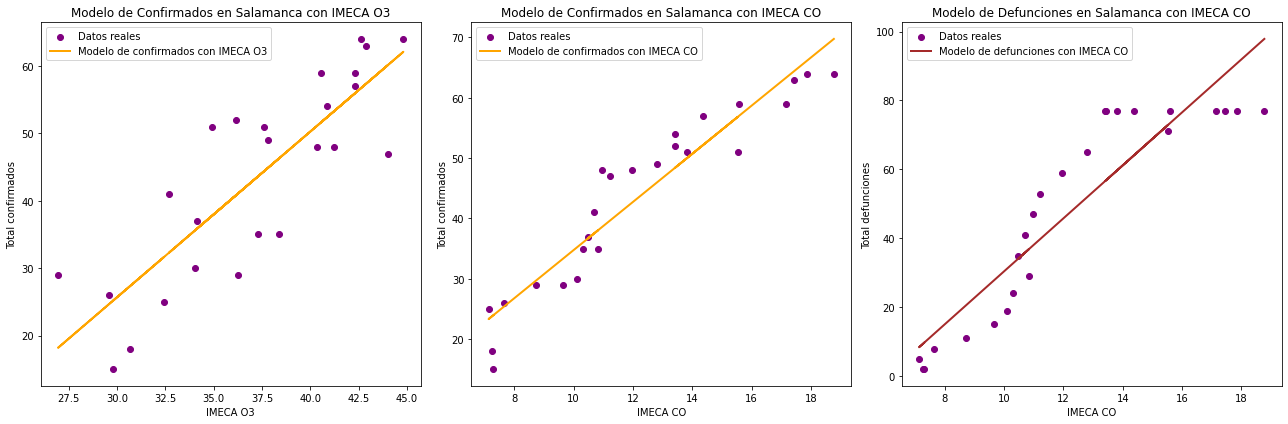

In [37]:
import matplotlib.pyplot as plt

# Crear una figura con tres subgráficos en una fila
plt.figure(figsize=(18, 6))

# Definir una paleta de colores común
colores = ['purple', 'orange', 'brown']

# Primer gráfico para IMECA O3 - Confirmados
plt.subplot(1, 3, 1)
plt.scatter(Xs_O3, Ysc_O3, color=colores[0], label='Datos reales')
plt.plot(Xs_O3, Ys_pg_O3, color=colores[1], linewidth=2, label='Modelo de confirmados con IMECA O3')
plt.title('Modelo de Confirmados en Salamanca con IMECA O3')
plt.xlabel('IMECA O3')
plt.ylabel('Total confirmados')
plt.legend()

# Segundo gráfico para IMECA CO - Confirmados
plt.subplot(1, 3, 2)
plt.scatter(Xs_CO, Ysc_CO, color=colores[0], label='Datos reales')
plt.plot(Xs_CO, Ys_pg_CO, color=colores[1], linewidth=2, label='Modelo de confirmados con IMECA CO')
plt.title('Modelo de Confirmados en Salamanca con IMECA CO')
plt.xlabel('IMECA CO')
plt.ylabel('Total confirmados')
plt.legend()

# Tercer gráfico para IMECA CO - Defunciones
plt.subplot(1, 3, 3)
plt.scatter(Xs_CO, Ysd_CO, color=colores[0], label='Datos reales')
plt.plot(Xs_CO, Ys_pgd_CO, color=colores[2], linewidth=2, label='Modelo de defunciones con IMECA CO')
plt.title('Modelo de Defunciones en Salamanca con IMECA CO')
plt.xlabel('IMECA CO')
plt.ylabel('Total defunciones')
plt.legend()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()


# REGRESION LINEAL MULTIPLE 'IMECA CO', 'IMECA O3', 'Total confirmados '

El modelo de regresión lineal múltiple ajustado utiliza dos variables independientes, el índice de calidad del aire para monóxido de carbono (IMECA CO) y el índice de calidad del aire para ozono (IMECA O3), para predecir la variable dependiente. En este contexto, la variable dependiente es el total de confirmados durante la primera ola de la pandemia de COVID-19 en Salamanca. El modelo examina cómo las concentraciones de monóxido de carbono y ozono en el aire se relacionan con el número total de confirmados en Salamanca durante el período específico de la primera ola de la pandemia.

Coeficientes: [3.81928482 0.82103111]
Intercepto: -28.096338381478304
R cuadrado: 0.9109431495618234


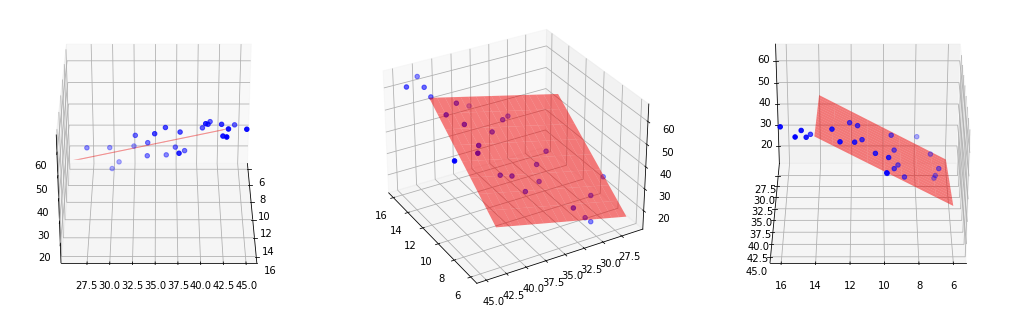

In [38]:

# Preparar los datos
df_Salamanca = xl.parse('Salamanca', skiprows = 2)
df_Salamanca['IMECA CO'] = df_Salamanca[['IMECA CO_1', 'IMECA CO_2']].mean(axis=1)
df_Salamanca['IMECA O3'] = df_Salamanca[['IMECA O3_1', 'IMECA O3_2', 'IMECA O3_3']].mean(axis=1)
df_Salamanca = df_Salamanca.dropna(subset=['IMECA CO', 'IMECA O3', 'Total confirmados '])

X = df_Salamanca[['IMECA CO', 'IMECA O3']]
y = df_Salamanca['Total confirmados ']

# Crear una instancia de LinearRegression
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Realizar predicciones
y_pred = modelo.predict(X)

# Calcular el valor R cuadrado
r2 = r2_score(y, y_pred)

# Imprimir coeficientes, intercepto y R cuadrado
print('Coeficientes:', modelo.coef_)
print('Intercepto:', modelo.intercept_)
print('R cuadrado:', r2)

# Crear la gráfica 3D
fig = plt.figure(figsize=(18, 6))

for i, angle in enumerate([0, 150, 90]):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.view_init(30, angle)
    ax.scatter(df_Salamanca['IMECA CO'], df_Salamanca['IMECA O3'], df_Salamanca['Total confirmados '], color='b')

    # Crear el hiperplano
    xx, yy = np.meshgrid(range(int(df_Salamanca['IMECA CO'].min()), int(df_Salamanca['IMECA CO'].max())), range(int(df_Salamanca['IMECA O3'].min()), int(df_Salamanca['IMECA O3'].max())))
    zz = modelo.intercept_ + modelo.coef_[0] * xx + modelo.coef_[1] * yy
    ax.plot_surface(xx, yy, zz, color='r', alpha=0.5)

plt.show()


El análisis revela que el modelo multivariable, utilizando como variables independientes los niveles de monóxido de carbono (CO) y ozono (O3), exhibe una notable efectividad, alcanzando aproximadamente un 91% de precisión en la predicción del número total de confirmados en el municipio de Salamanca. 

# Regresion lineal multiple 'IMECA CO', 'IMECA O3', 'Total confirmados ', 'Total defunciones '

Coeficientes: [8.19187492 1.03114963]
Intercepto: -79.10765062121644
R cuadrado: 0.8402794818326994


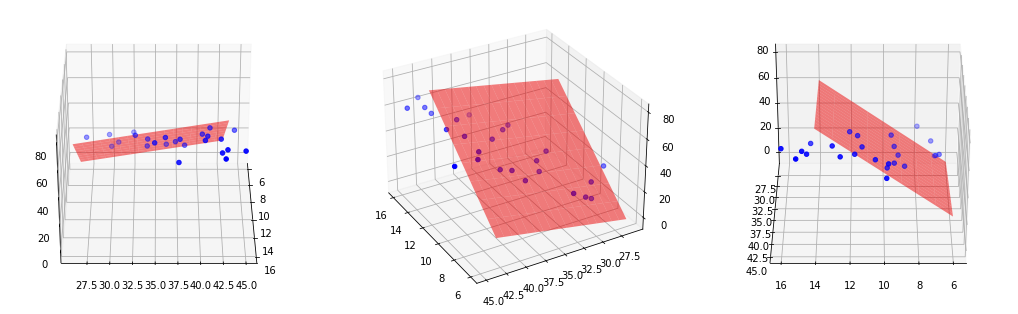

In [39]:
# Preparar los datos
df_Salamanca = xl.parse('Salamanca', skiprows = 2)
df_Salamanca['IMECA CO'] = df_Salamanca[['IMECA CO_1', 'IMECA CO_2']].mean(axis=1)
df_Salamanca['IMECA O3'] = df_Salamanca[['IMECA O3_1', 'IMECA O3_2', 'IMECA O3_3']].mean(axis=1)
df_Salamanca = df_Salamanca.dropna(subset=['IMECA CO', 'IMECA O3', 'Total confirmados ', 'Total defunciones '])

X = df_Salamanca[['IMECA CO', 'IMECA O3']]
y = df_Salamanca['Total defunciones ']

# Crear una instancia de LinearRegression
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X, y)

# Realizar predicciones
y_pred = modelo.predict(X)

# Calcular el valor R cuadrado
r2 = r2_score(y, y_pred)

# Imprimir coeficientes, intercepto y R cuadrado
print('Coeficientes:', modelo.coef_)
print('Intercepto:', modelo.intercept_)
print('R cuadrado:', r2)

# Crear la gráfica 3D
fig = plt.figure(figsize=(18, 6))

for i, angle in enumerate([0, 150, 90]):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.view_init(30, angle)
    ax.scatter(df_Salamanca['IMECA CO'], df_Salamanca['IMECA O3'], df_Salamanca['Total confirmados '], color='b')

    # Crear el hiperplano
    xx, yy = np.meshgrid(range(int(df_Salamanca['IMECA CO'].min()), int(df_Salamanca['IMECA CO'].max())), range(int(df_Salamanca['IMECA O3'].min()), int(df_Salamanca['IMECA O3'].max())))
    zz = modelo.intercept_ + modelo.coef_[0] * xx + modelo.coef_[1] * yy
    ax.plot_surface(xx, yy, zz, color='r', alpha=0.5)

plt.show()



El modelo de regresión lineal múltiple ajustado en este caso emplea dos variables independientes: el índice de calidad del aire para monóxido de carbono (IMECA CO) y el índice de calidad del aire para ozono (IMECA O3). El análisis de este modelo revela una efectividad del 84%, indicando su capacidad para explicar y predecir las variaciones en el número de defunciones asociadas a la calidad del aire en la mencionada localidad.